# 样例

```{note}
本项目主要针对 Python 包进行维护，且 fork 本项目之后，您还需要对本项目进行编译以支持 `mask`，编译方法见 [COCO 数据集的使用](https://www.cnblogs.com/q735613050/p/8969452.html) 的 “1 简介” 部分。
```

本节阐述 COCO API 的简单使用。

以局部加载 `pycocotools` 的方式，使用该 API。

In [1]:
import sys
from pathlib import Path
path = Path("../src").resolve()
sys.path.extend([str(path)])

In [14]:
from pycocotools.coco import COCO
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (8.0, 10.0)

In [3]:
dataDir = '/media/pc/data/4tb/lxw/tests/datasets/coco'
dataType = 'val2017'
annFile = f'{dataDir}/annotations/instances_{dataType}.json'

为实例注解初始化 COCO api：

In [4]:
coco = COCO(annFile)

loading annotations into memory...
Done (t=1.22s)
creating index...
index created!


显示 COCO 类别和超类别：

In [8]:
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
nms = ' '.join(nms)
print(f'COCO categories: \n{nms}\n')

nms = set([cat['supercategory'] for cat in cats])
nms = ' '.join(nms)
print(f'COCO supercategories: \n{nms}')

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
kitchen appliance furniture outdoor vehicle sports food animal electronic indoor accessory person


获取所有包含给定类别的图像，随机选择一个：

In [9]:
catIds = coco.getCatIds(catNms=['person', 'dog', 'skateboard'])
imgIds = coco.getImgIds(catIds=catIds )
imgIds = coco.getImgIds(imgIds=[324158])
img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]

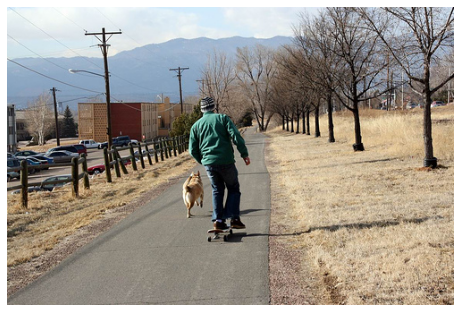

In [15]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

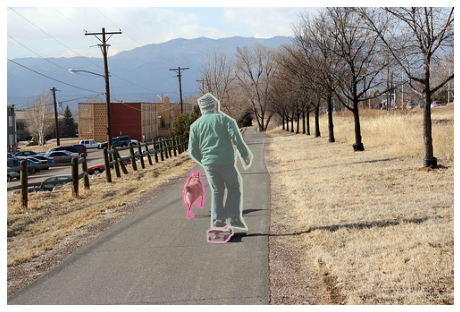

In [21]:
# load and display instance annotations
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=False)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [17]:
# initialize COCO api for person keypoints annotations
annFile = f'{dataDir}/annotations/person_keypoints_{dataType}.json'
coco_kps = COCO(annFile)

loading annotations into memory...
Done (t=1.11s)
creating index...
index created!


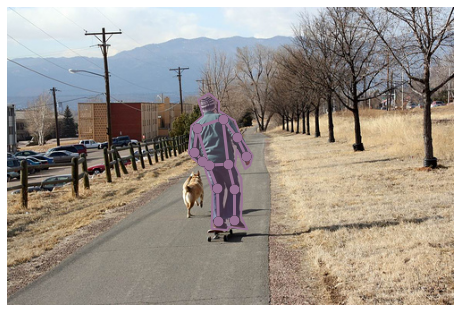

In [23]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=False)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [19]:
# initialize COCO api for caption annotations
annFile = f'{dataDir}/annotations/captions_{dataType}.json'
coco_caps = COCO(annFile)

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


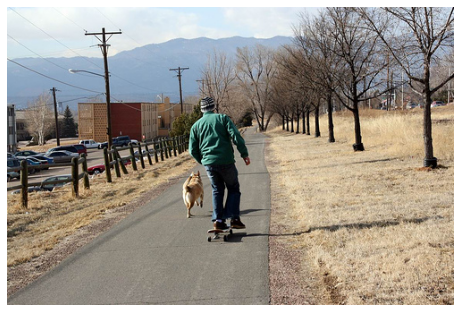

In [20]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id'])
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I)
plt.axis('off')
plt.show()